<a href="https://colab.research.google.com/github/pame-olguin/TelecomX_parte2_latam/blob/main/TelecomX_parte2_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extracción del Archivo Tratado

In [32]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd

df_filtrado_copia = pd.read_csv('/content/drive/My Drive/Colab Notebooks/clientes_filtrados.csv')


In [34]:
df_filtrado_copia.head()


,ID_cliente,Cancelacion,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas,Tipo_internet,...,TV_streaming,Peliculas_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Costo_diario,Cancelacion_str,Facturacion_str
0,0002-orfbo,0,mujer,0,1,1,9,1,0,DSL,...,1,0,Anual,1,Cheque por correo,65.6,593.30,2.186667,Permaneció,Sin papel
1,0003-mknfe,0,hombre,0,0,0,9,1,1,DSL,...,0,1,Mensual,0,Cheque por correo,59.9,542.40,1.996667,Permaneció,Con papel
2,0004-tlhlj,1,hombre,0,0,0,4,1,0,Fibra óptica,...,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.463333,Canceló,Sin papel
3,0011-igkff,1,hombre,1,1,0,13,1,0,Fibra óptica,...,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.266667,Canceló,Sin papel
4,0013-exchz,1,mujer,1,1,0,3,1,0,Fibra óptica,...,1,0,Mensual,1,Cheque por correo,83.9,267.40,2.796667,Canceló,Sin papel


In [35]:
df_filtrado_copia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7043 non-null   object 
 1   Cancelacion             7043 non-null   int64  
 2   Genero                  7043 non-null   object 
 3   Ciudadano_mayor         7043 non-null   int64  
 4   Tiene_pareja            7043 non-null   int64  
 5   Tiene_dependientes      7043 non-null   int64  
 6   Antiguedad_meses        7043 non-null   int64  
 7   Servicio_telefonico     7043 non-null   int64  
 8   Multiples_lineas        7043 non-null   int64  
 9   Tipo_internet           7043 non-null   object 
 10  Seguridad_en_linea      7043 non-null   int64  
 11  Copia_seguridad         7043 non-null   int64  
 12  Proteccion_dispositivo  7043 non-null   int64  
 13  Soporte_tecnico         7043 non-null   int64  
 14  TV_streaming            7043 non-null   

##Eliminación de Columnas Irrelevantes

In [36]:
df_modelo = df_filtrado_copia.drop(columns=['ID_cliente', 'Cancelacion_str', 'Facturacion_str'])


In [37]:
df_modelo.head()


,Cancelacion,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas,Tipo_internet,Seguridad_en_linea,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Costo_diario
0,0,mujer,0,1,1,9,1,0,DSL,0,...,0,1,1,0,Anual,1,Cheque por correo,65.6,593.30,2.186667
1,0,hombre,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Mensual,0,Cheque por correo,59.9,542.40,1.996667
2,1,hombre,0,0,0,4,1,0,Fibra óptica,0,...,1,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.463333
3,1,hombre,1,1,0,13,1,0,Fibra óptica,0,...,1,0,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.266667
4,1,mujer,1,1,0,3,1,0,Fibra óptica,0,...,0,1,1,0,Mensual,1,Cheque por correo,83.9,267.40,2.796667


In [38]:
# Verifica qué columnas son categóricas
columnas_categoricas = df_modelo.select_dtypes(include='object').columns.tolist()

# Aplica pd.get_dummies
df_dummies = pd.get_dummies(df_modelo, columns=columnas_categoricas, drop_first=True)


In [39]:
# Conteo absoluto
conteo_cancelacion = df_dummies['Cancelacion'].value_counts()

# Proporción relativa
proporcion_cancelacion = df_dummies['Cancelacion'].value_counts(normalize=True)

print("Conteo de Cancelación:")
print(conteo_cancelacion)

print("\nProporción de Cancelación:")
print(proporcion_cancelacion)


Conteo de Cancelación:
Cancelacion
0    5174
1    1869
Name: count, dtype: int64

Proporción de Cancelación:
Cancelacion
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [40]:
# Usamos df_dummies como fuente
X = df_dummies.drop('Cancelacion', axis=1)
y = df_dummies['Cancelacion']

# División en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced', random_state=42))
])

pipe_lr.fit(X_train_bal, y_train_bal)


Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_bal, y_train_bal)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
from sklearn.metrics import classification_report

# Regresión Logística
y_pred_lr = pipe_lr.predict(X_test)
print("📈 Regresión Logística:\n", classification_report(y_test, y_pred_lr))

# Random Forest
y_pred_rf = rf.predict(X_test)
print("🌲 Random Forest:\n", classification_report(y_test, y_pred_rf))


📈 Regresión Logística:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      1035
           1       0.56      0.68      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

🌲 Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.61      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409



/tmp/ipython-input-1769474660.py:16: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


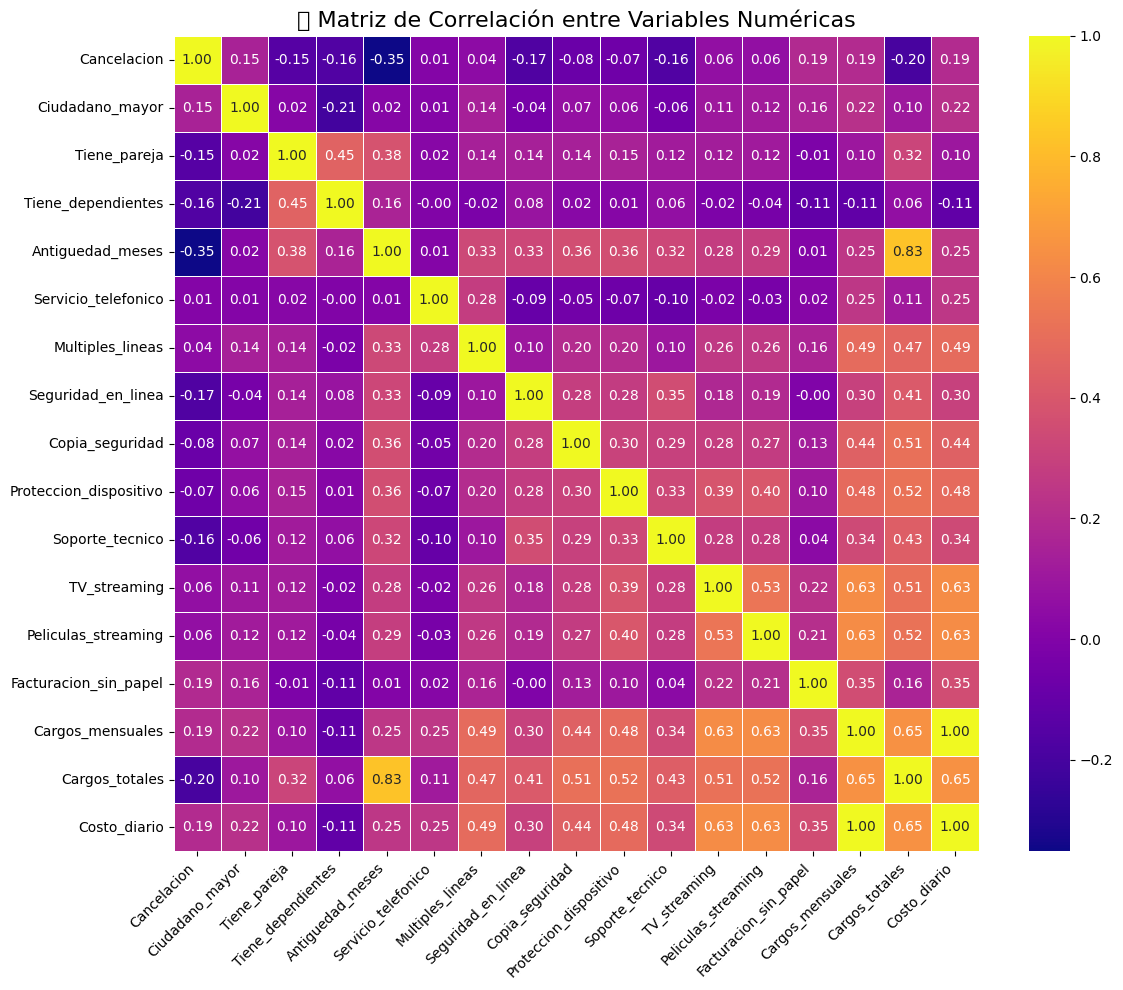

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo variables numéricas
numeric_df = df_dummies.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="plasma", linewidths=0.5)
plt.title("🔍 Matriz de Correlación entre Variables Numéricas", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [46]:
correlaciones_cancelacion = correlation_matrix['Cancelacion'].sort_values(ascending=False)
print("🔎 Variables más correlacionadas con Cancelación:\n")
print(correlaciones_cancelacion.head(10))  # Top positivas
print("\n🔻 Variables más inversamente correlacionadas:\n")
print(correlaciones_cancelacion.tail(10))  # Top negativas


🔎 Variables más correlacionadas con Cancelación:

Cancelacion               1.000000
Cargos_mensuales          0.193356
Costo_diario              0.193356
Facturacion_sin_papel     0.191825
Ciudadano_mayor           0.150889
TV_streaming              0.063228
Peliculas_streaming       0.061382
Multiples_lineas          0.040102
Servicio_telefonico       0.011942
Proteccion_dispositivo   -0.066160
Name: Cancelacion, dtype: float64

🔻 Variables más inversamente correlacionadas:

Multiples_lineas          0.040102
Servicio_telefonico       0.011942
Proteccion_dispositivo   -0.066160
Copia_seguridad          -0.082255
Tiene_pareja             -0.150448
Tiene_dependientes       -0.164221
Soporte_tecnico          -0.164674
Seguridad_en_linea       -0.171226
Cargos_totales           -0.198324
Antiguedad_meses         -0.352229
Name: Cancelacion, dtype: float64


/tmp/ipython-input-3530992621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancelacion', y='Antiguedad_meses', data=df_modelo, palette='Set2')


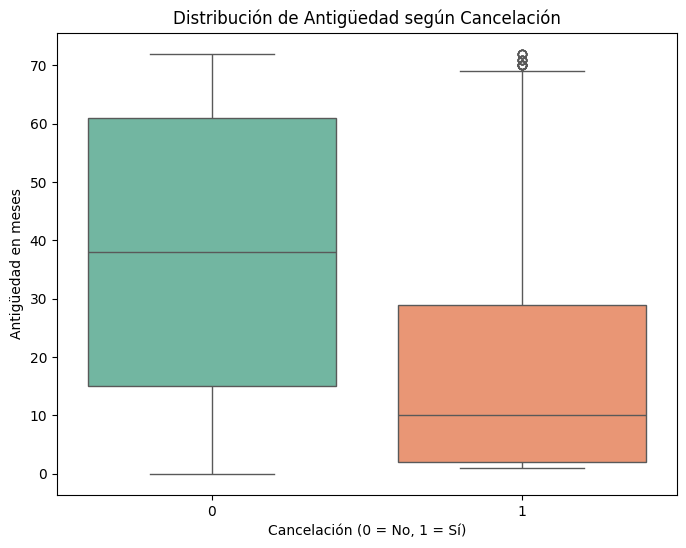

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cancelacion', y='Antiguedad_meses', data=df_modelo, palette='Set2')
plt.title('Distribución de Antigüedad según Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Antigüedad en meses')
plt.show()


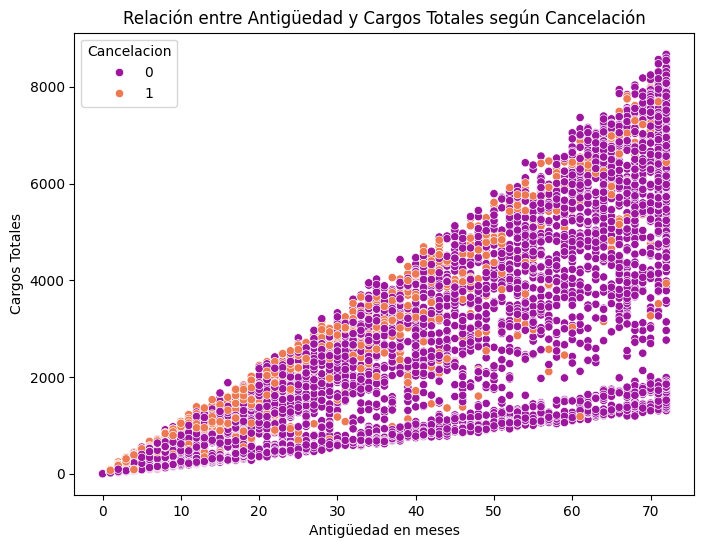

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Antiguedad_meses', y='Cargos_totales', hue='Cancelacion', data=df_modelo, palette='plasma')
plt.title('Relación entre Antigüedad y Cargos Totales según Cancelación')
plt.xlabel('Antigüedad en meses')
plt.ylabel('Cargos Totales')
plt.show()


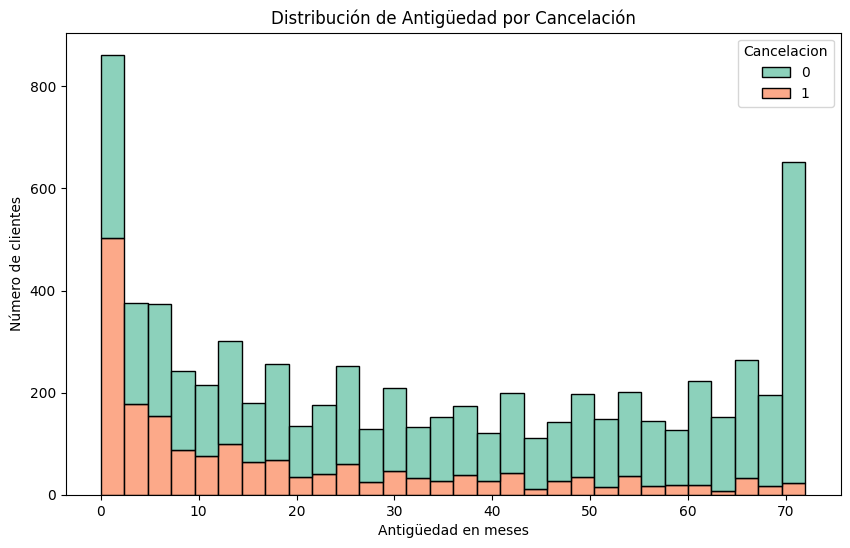

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_modelo, x='Antiguedad_meses', hue='Cancelacion', multiple='stack', bins=30, palette='Set2')
plt.title('Distribución de Antigüedad por Cancelación')
plt.xlabel('Antigüedad en meses')
plt.ylabel('Número de clientes')
plt.show()


/tmp/ipython-input-1585037161.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelacion_por_grupo = df_modelo.groupby('grupo_antiguedad')['Cancelacion'].mean()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


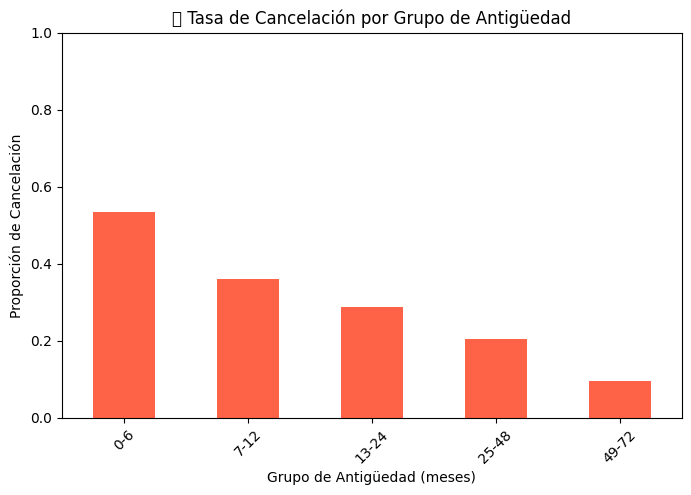

In [50]:
df_modelo['grupo_antiguedad'] = pd.cut(df_modelo['Antiguedad_meses'], bins=[0, 6, 12, 24, 48, 72], labels=['0-6', '7-12', '13-24', '25-48', '49-72'])

cancelacion_por_grupo = df_modelo.groupby('grupo_antiguedad')['Cancelacion'].mean()

cancelacion_por_grupo.plot(kind='bar', color='tomato', figsize=(8, 5))
plt.title('📉 Tasa de Cancelación por Grupo de Antigüedad')
plt.ylabel('Proporción de Cancelación')
plt.xlabel('Grupo de Antigüedad (meses)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


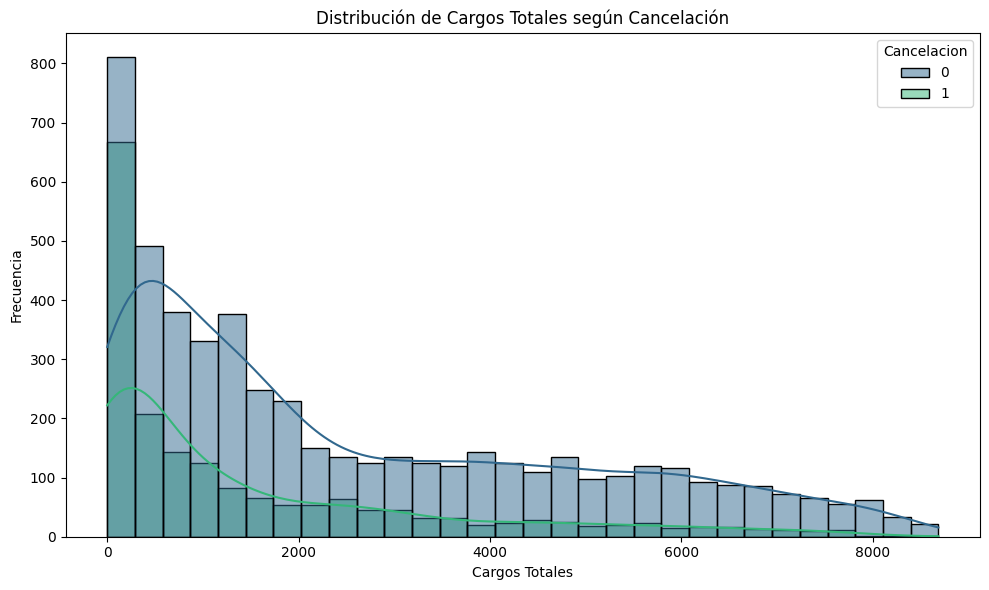

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_modelo, x='Cargos_totales', hue='Cancelacion', kde=True, palette='viridis', bins=30)
plt.title('Distribución de Cargos Totales según Cancelación')
plt.xlabel('Cargos Totales')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


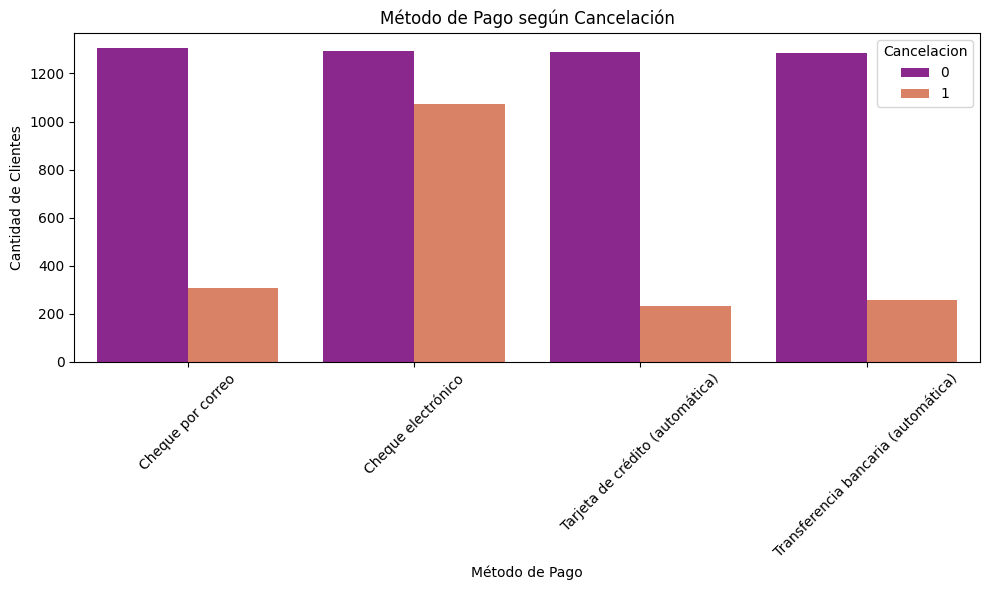

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_modelo, x='Metodo_pago', hue='Cancelacion', palette='plasma')
plt.title('Método de Pago según Cancelación')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-415370737.py:10: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


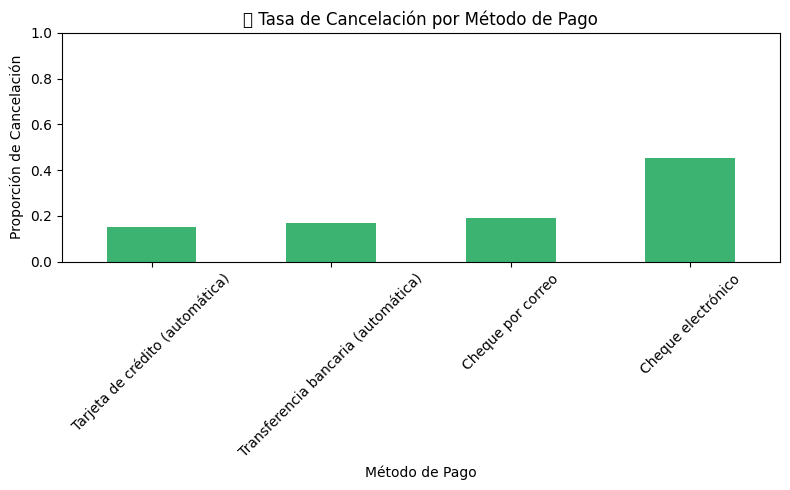

In [53]:
tasa_cancelacion = df_modelo.groupby('Metodo_pago')['Cancelacion'].mean().sort_values()

plt.figure(figsize=(8, 5))
tasa_cancelacion.plot(kind='bar', color='mediumseagreen')
plt.title('📉 Tasa de Cancelación por Método de Pago')
plt.ylabel('Proporción de Cancelación')
plt.xlabel('Método de Pago')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


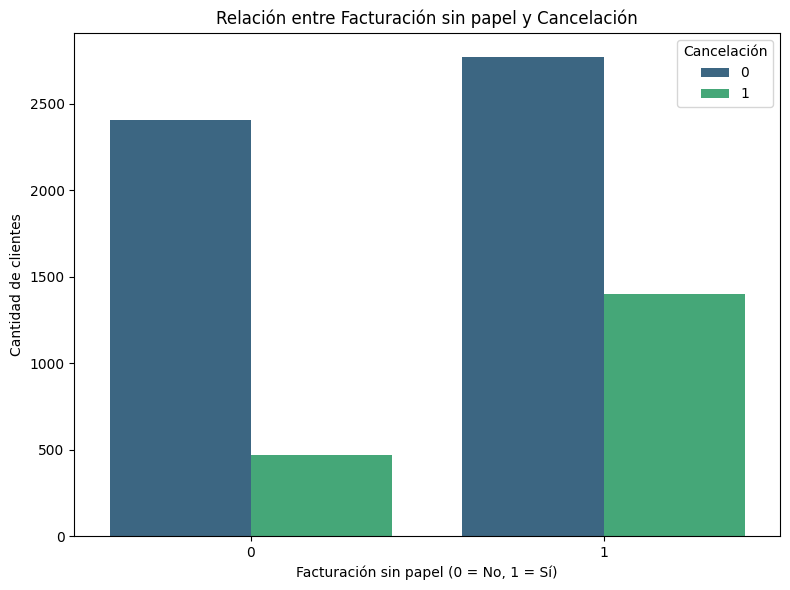

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_modelo, x='Facturacion_sin_papel', hue='Cancelacion', palette='viridis')
plt.title('Relación entre Facturación sin papel y Cancelación')
plt.xlabel('Facturación sin papel (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Cancelación')
plt.tight_layout()
plt.show()


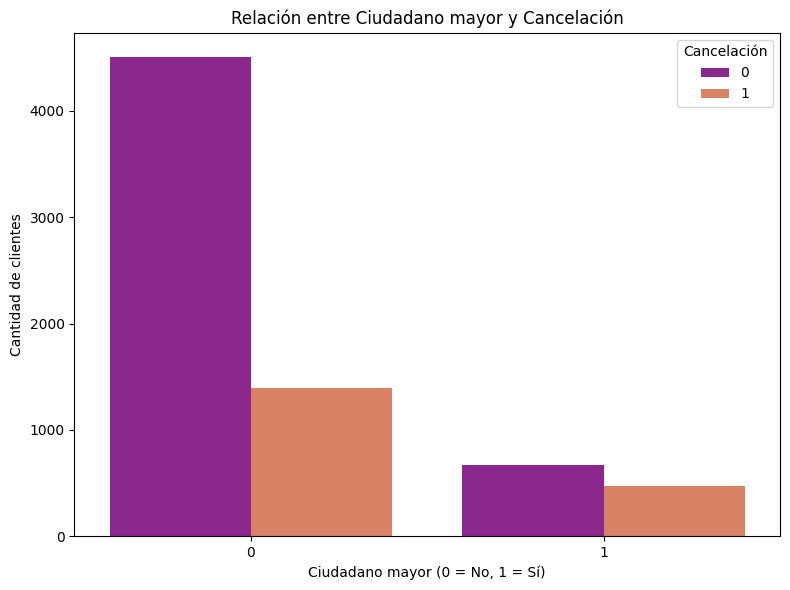

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_modelo, x='Ciudadano_mayor', hue='Cancelacion', palette='plasma')
plt.title('Relación entre Ciudadano mayor y Cancelación')
plt.xlabel('Ciudadano mayor (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Cancelación')
plt.tight_layout()
plt.show()


In [56]:
# Agrupamos por Ciudadano mayor y Cancelación
cancel_rate_mayor = df_modelo.groupby('Ciudadano_mayor')['Cancelacion'].value_counts(normalize=True).unstack()

# Renombramos columnas
cancel_rate_mayor.columns = ['No Canceló', 'Canceló']
cancel_rate_mayor.index = ['No es adulto mayor', 'Es adulto mayor']

# Mostramos como porcentaje
cancel_rate_mayor = (cancel_rate_mayor * 100).round(2)
print(cancel_rate_mayor)


                    No Canceló  Canceló
No es adulto mayor       76.39    23.61
Es adulto mayor          58.32    41.68


#**separacion de datos: para entrenamiento y prueba**#

In [60]:
from sklearn.model_selection import train_test_split

X = df_dummies.drop('Cancelacion', axis=1)
y = df_dummies['Cancelacion']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



#**Creación de modelos**#

#Modelo 1: Regresión Logística (requiere normalización)#
✅ Justificación
La Regresión Logística optimiza una función de pérdida basada en los coeficientes de las variables. Si las variables tienen escalas muy distintas (por ejemplo, antigüedad en meses vs cargos diarios), los coeficientes pueden verse sesgados, afectando la interpretación y el rendimiento. Por eso, normalizamos con StandardScaler.

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced', random_state=42))
])

pipe_lr.fit(X_train_bal, y_train_bal)



Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=42))])

#2. Modelo sin normalización: Random Forest

**Justificación:**
Random Forest construye árboles de decisión basados en reglas como “¿Antigüedad > 12?”. Estas reglas no dependen de la escala de los datos, por lo que no es necesario normalizar.

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_bal, y_train_bal)


RandomForestClassifier(class_weight='balanced', random_state=42)

#Evaluación de ambos modelos

In [63]:
from sklearn.metrics import classification_report

# Regresión Logística
y_pred_lr = pipe_lr.predict(X_test)
print("📈 Regresión Logística:\n", classification_report(y_test, y_pred_lr))

# Random Forest
y_pred_rf = rf.predict(X_test)
print("🌲 Random Forest:\n", classification_report(y_test, y_pred_rf))


📈 Regresión Logística:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84      1035
           1       0.56      0.68      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

🌲 Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.61      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409



#comparación de métricas

🔍 Evaluación para Regresión Logística
Accuracy: 0.77
Precision (1): 0.56
Recall (1): 0.68
F1-score (1): 0.61


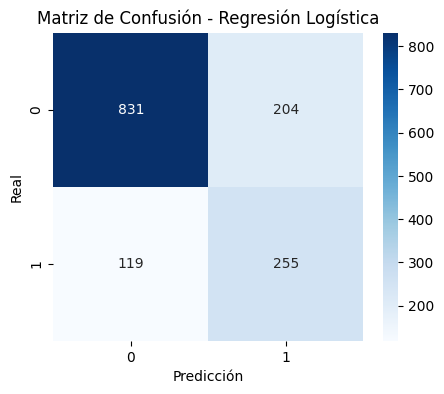

🔍 Evaluación para Random Forest
Accuracy: 0.77
Precision (1): 0.57
Recall (1): 0.61
F1-score (1): 0.59


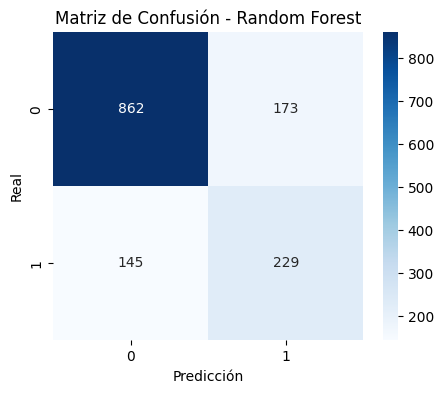

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluar_modelo(y_true, y_pred, nombre):
    print(f"🔍 Evaluación para {nombre}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision (1): {precision_score(y_true, y_pred, pos_label=1):.2f}")
    print(f"Recall (1): {recall_score(y_true, y_pred, pos_label=1):.2f}")
    print(f"F1-score (1): {f1_score(y_true, y_pred, pos_label=1):.2f}")

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# Evaluar Regresión Logística
evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")

# Evaluar Random Forest
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


#Análisis final
🔍 ¿Cuál modelo detecta mejor las cancelaciones?

Regresión Logística tiene mejor recall → detecta más cancelaciones reales.

Random Forest tiene mejor precisión → comete menos falsos positivos.

In [66]:
from sklearn.metrics import accuracy_score

y_train_pred_rf = rf.predict(X_train_bal)
print("Accuracy en entrenamiento (RF):", accuracy_score(y_train_bal, y_train_pred_rf))


Accuracy en entrenamiento (RF): 0.9984295723604736


In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,               # Limita la profundidad
    min_samples_leaf=10,       # Evita ramas con pocos datos
    class_weight='balanced',   # Compensa el desbalance
    random_state=42
)

rf.fit(X_train_bal, y_train_bal)


RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=10, random_state=42)

In [68]:
from sklearn.metrics import classification_report

y_test_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_test_pred_rf))


              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1035
           1       0.54      0.76      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



#🔍 Interpretación

✅ Clase 1 (Canceló)

Recall = 0.76: El modelo detecta el 76% de los clientes que realmente cancelaron.

Precision = 0.54: De todos los que predijo como cancelación, el 54% realmente lo eran. Aún hay falsos positivos, pero menos que antes.

F1-score = 0.63: Buen equilibrio entre precisión y recall.

✅ Clase 0 (No canceló)

Precision = 0.90: Muy confiable al predecir que un cliente no cancelará.

Recall = 0.76: Detecta el 76% de los que realmente no cancelaron.

In [70]:
modelo_lr = pipe_lr.named_steps['lr']



In [72]:
import numpy as np

# Extraer el modelo desde el pipeline
modelo_lr = pipe_lr.named_steps['lr']

# Obtener coeficientes
coef = modelo_lr.coef_[0]
features = X_train.columns
coef_df = pd.DataFrame({'Variable': features, 'Coeficiente': coef})
coef_df['Odds_ratio'] = np.exp(coef_df['Coeficiente'])  # Interpretación como riesgo relativo
coef_df.sort_values(by='Odds_ratio', ascending=False, inplace=True)
print(coef_df)


                                           Variable  Coeficiente  Odds_ratio
15                                     Costo_diario     2.716476   15.126926
13                                 Cargos_mensuales     2.716476   15.126926
18                       Tipo_internet_Sin internet     1.416317    4.121909
14                                   Cargos_totales     1.237952    3.448545
20                            Tipo_contrato_Mensual     0.573886    1.775153
16                                     Genero_mujer     0.189565    1.208724
21                    Metodo_pago_Cheque por correo     0.086294    1.090127
19                            Tipo_contrato_Bianual     0.049314    1.050550
23  Metodo_pago_Transferencia bancaria (automática)     0.044340    1.045337
22      Metodo_pago_Tarjeta de crédito (automática)     0.040384    1.041211
12                            Facturacion_sin_papel     0.036736    1.037419
0                                   Ciudadano_mayor    -0.090090    0.913849

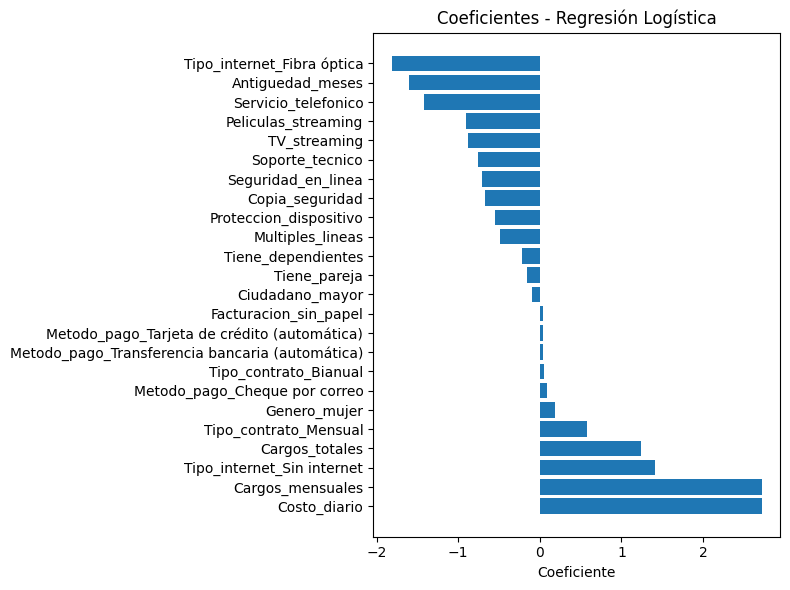

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(coef_df['Variable'], coef_df['Coeficiente'])
plt.title('Coeficientes - Regresión Logística')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()


📊 Coeficientes por Variable: muestra el impacto directo de cada variable en la predicción (positivos aumentan la probabilidad de cancelación, negativos la reducen).

📈 Odds Ratio por Variable: interpreta el efecto en términos de riesgo relativo (valores >1 aumentan el riesgo, <1 lo disminuyen).

#Importancia de variables en Random Forest

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

importancia_rf = rf.feature_importances_
features = X_train.columns
importancia_df = pd.DataFrame({'Variable': features, 'Importancia': importancia_rf})
importancia_df.sort_values(by='Importancia', ascending=False, inplace=True)
print(importancia_df)


                                           Variable  Importancia
20                            Tipo_contrato_Mensual     0.258956
17                       Tipo_internet_Fibra óptica     0.126937
3                                  Antiguedad_meses     0.113589
19                            Tipo_contrato_Bianual     0.064939
14                                   Cargos_totales     0.064196
9                                   Soporte_tecnico     0.062980
13                                 Cargos_mensuales     0.054432
6                                Seguridad_en_linea     0.043509
1                                      Tiene_pareja     0.042115
2                                Tiene_dependientes     0.038477
15                                     Costo_diario     0.038079
18                       Tipo_internet_Sin internet     0.027245
7                                   Copia_seguridad     0.017370
8                            Proteccion_dispositivo     0.012198
4                        

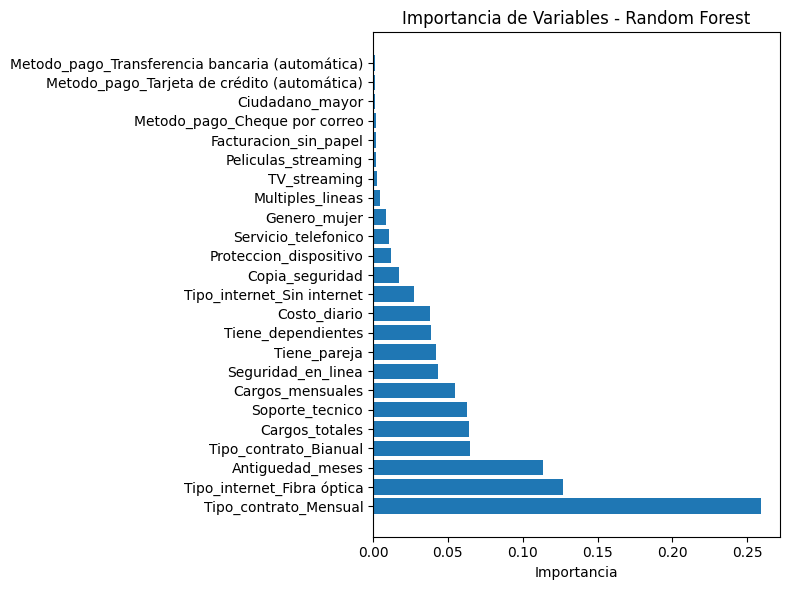

In [75]:
plt.figure(figsize=(8, 6))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'])
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


#Comparacion entre los modelos

In [76]:
# Unir por variable
comparacion = coef_df[['Variable', 'Odds_ratio']].merge(
    importancia_df, on='Variable', how='outer'
)

# Normalizar para comparar
comparacion['Odds_ratio_norm'] = comparacion['Odds_ratio'] / comparacion['Odds_ratio'].max()
comparacion['Importancia_norm'] = comparacion['Importancia'] / comparacion['Importancia'].max()

# Diferencia entre modelos
comparacion['Diferencia'] = comparacion['Odds_ratio_norm'] - comparacion['Importancia_norm']
comparacion.sort_values(by='Diferencia', ascending=False, inplace=True)
print(comparacion)


                                           Variable  Odds_ratio  Importancia  \
5                                      Costo_diario   15.126926     0.038079   
1                                  Cargos_mensuales   15.126926     0.054432   
23                       Tipo_internet_Sin internet    4.121909     0.027245   
8                     Metodo_pago_Cheque por correo    1.090127     0.001608   
10  Metodo_pago_Transferencia bancaria (automática)    1.045337     0.001136   
9       Metodo_pago_Tarjeta de crédito (automática)    1.041211     0.001276   
6                             Facturacion_sin_papel    1.037419     0.001620   
3                                   Ciudadano_mayor    0.913849     0.001539   
7                                      Genero_mujer    1.208724     0.008466   
11                                 Multiples_lineas    0.613126     0.004302   
12                              Peliculas_streaming    0.402755     0.001772   
17                                     T

Variables como

*   Costo_diario,
*   Cargos_mensuales
*   Cargos_totales

tienen alto impacto en ambos modelos.

Otras variables como

*   Antigüedad_meses
*   Tipo_contrato_Mensual

son mucho más relevantes para Random Forest que para la regresión.

#KNN – Análisis de variables relevantes

In [78]:
from sklearn.feature_selection import f_classif, mutual_info_classif

# ANOVA F-test
f_scores, _ = f_classif(X_train, y_train)
f_df = pd.DataFrame({'Variable': X_train.columns, 'F_score': f_scores})
f_df.sort_values(by='F_score', ascending=False, inplace=True)
print(f_df)

# Mutual Information
mi_scores = mutual_info_classif(X_train, y_train)
mi_df = pd.DataFrame({'Variable': X_train.columns, 'MI_score': mi_scores})
mi_df.sort_values(by='MI_score', ascending=False, inplace=True)
print(mi_df)


                                           Variable      F_score
20                            Tipo_contrato_Mensual  1123.436331
3                                  Antiguedad_meses   796.252024
17                       Tipo_internet_Fibra óptica   573.079626
19                            Tipo_contrato_Bianual   567.502279
18                       Tipo_internet_Sin internet   302.101362
14                                   Cargos_totales   237.143030
12                            Facturacion_sin_papel   217.184059
15                                     Costo_diario   208.368848
13                                 Cargos_mensuales   208.368848
9                                   Soporte_tecnico   169.972298
6                                Seguridad_en_linea   164.732761
2                                Tiene_dependientes   144.276546
0                                   Ciudadano_mayor   135.241327
1                                      Tiene_pareja   133.256129
22      Metodo_pago_Tarje

#Resultados destacados
🥇 **Top 5 variables por ANOVA F-test:**

Costo_diario

Cargos_mensuales

Tipo_internet_Sin internet

Cargos_totales

Tipo_contrato_Mensual

🥇 **Top 5 variables por Mutual Information:**

Costo_diario

Cargos_mensuales

Tipo_internet_Sin internet

Cargos_totales

Tipo_contrato_Mensual

✅ **Interpretación**

Las variables que más contribuyen a la proximidad entre puntos (y por tanto a la clasificación en KNN) son las mismas que dominan en Regresión Logística y Random Forest. Esto refuerza su relevancia para la predicción de cancelación.



#SVM – Análisis de coeficientes

In [79]:
from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight='balanced', random_state=42)
svm.fit(X_train_bal, y_train_bal)

coef = svm.coef_[0]
svm_df = pd.DataFrame({'Variable': X_train.columns, 'Coeficiente': coef})
svm_df['Impacto'] = np.abs(svm_df['Coeficiente'])  # Magnitud del impacto
svm_df.sort_values(by='Impacto', ascending=False, inplace=True)
print(svm_df)


                                           Variable  Coeficiente   Impacto
4                               Servicio_telefonico    -0.826512  0.826512
9                                   Soporte_tecnico    -0.508886  0.508886
6                                Seguridad_en_linea    -0.460419  0.460419
20                            Tipo_contrato_Mensual     0.379200  0.379200
7                                   Copia_seguridad    -0.335985  0.335985
11                              Peliculas_streaming    -0.253507  0.253507
8                            Proteccion_dispositivo    -0.249659  0.249659
10                                     TV_streaming    -0.221928  0.221928
2                                Tiene_dependientes    -0.216691  0.216691
17                       Tipo_internet_Fibra óptica    -0.181548  0.181548
1                                      Tiene_pareja    -0.142941  0.142941
19                            Tipo_contrato_Bianual     0.129383  0.129383
16                       

#Interpretación

**Variables con mayor impacto negativo** (reducen probabilidad de cancelación):

**Servicio_telefonico (–0.83)**: tener este servicio está fuertemente asociado con retención.

**Soporte_tecnico, Seguridad_en_linea, Copia_seguridad**: todos contribuyen a mantener al cliente.

**Peliculas_streaming, TV_streaming**: también tienen efecto protector, aunque menor.

**Variables con impacto positivo** (aumentan probabilidad de cancelación):

**Tipo_contrato_Mensual (+0.38)**: como en otros modelos, este tipo de contrato está vinculado a mayor churn.

**Tipo_contrato_Bianual (+0.13)**: aunque positivo, su impacto es menor.

**Genero_mujer, Métodos de pago automáticos**: tienen efecto leve pero positivo.

🔻 **Variables con impacto casi nulo**:
Costo_diario, Cargos_totales, Facturación sin papel: el modelo no las considera relevantes.

In [80]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm, X_test, y_test, n_repeats=10, random_state=42)
perm_df = pd.DataFrame({'Variable': X_test.columns, 'Importancia': result.importances_mean})
perm_df.sort_values(by='Importancia', ascending=False, inplace=True)
print(perm_df)


                                           Variable  Importancia
13                                 Cargos_mensuales     0.135131
3                                  Antiguedad_meses     0.105039
14                                   Cargos_totales     0.040383
6                                Seguridad_en_linea     0.024769
9                                   Soporte_tecnico     0.022072
20                            Tipo_contrato_Mensual     0.016608
4                               Servicio_telefonico     0.014620
10                                     TV_streaming     0.014265
7                                   Copia_seguridad     0.013556
8                            Proteccion_dispositivo     0.011710
11                              Peliculas_streaming     0.007026
17                       Tipo_internet_Fibra óptica     0.005252
19                            Tipo_contrato_Bianual     0.004755
18                       Tipo_internet_Sin internet     0.002484
23  Metodo_pago_Transfere

#Análisis por grupos
**Variables más influyentes**

**Cargos_mensuales**(0.135): Es la más crítica. Clientes con cargos altos podrían estar más propensos a cancelar.

**Antiguedad_meses**(0.105): Clientes más antiguos tienden a quedarse. Muy relevante.

**Cargos_totales**(0.040): Relacionada con el historial de pagos. Menos importante que mensual, pero aún útil.

Estas tres variables son las que más afectan la predicción. Son candidatas para análisis de segmentos, visualizaciones y explicaciones al negocio.

**Variables con importancia moderada**

Seguridad_en_linea(0.025): Puede reflejar compromiso con servicios adicionales.

Soporte_tecnico(0.022): Influye, quizás por la percepción de calidad.

Tipo_contrato_Mensual(0.017): Contratos mensuales suelen tener mayor riesgo de churn.

Servicio_telefonico(0.015): Ligero impacto.

Estas variables apoyan la predicción, pero no son tan decisivas como las anteriores.



#Otro modelo : XGBoost

In [81]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_bal, y_train_bal)

importancia = xgb.feature_importances_
xgb_df = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importancia})
xgb_df.sort_values(by='Importancia', ascending=False, inplace=True)
print(xgb_df)


                                           Variable  Importancia
20                            Tipo_contrato_Mensual     0.496482
17                       Tipo_internet_Fibra óptica     0.183157
9                                   Soporte_tecnico     0.034846
4                               Servicio_telefonico     0.032474
6                                Seguridad_en_linea     0.025617
2                                Tiene_dependientes     0.023334
18                       Tipo_internet_Sin internet     0.019065
7                                   Copia_seguridad     0.018350
3                                  Antiguedad_meses     0.014524
16                                     Genero_mujer     0.013562
1                                      Tiene_pareja     0.013462
8                            Proteccion_dispositivo     0.013069
11                              Peliculas_streaming     0.012993
13                                 Cargos_mensuales     0.011616
23  Metodo_pago_Transfere

Análisis del resultado
🔝 Variables dominantes

Tipo_contrato_Mensual(0.496): Claramente la más influyente. Los clientes con contrato mensual tienen mayor riesgo de churn.

Tipo_internet_Fibra óptica(0.183): Muy relevante. Puede estar asociada a clientes más comprometidos o con mayor expectativa de servicio.

Estas dos variables dominan el modelo XGBoost, lo que sugiere que el tipo de contrato y el tipo de internet son claves para predecir cancelación.

##**Informe de Análisis de Cancelación de Clientes**
###1. 🎯 Objetivo del análisis

El propósito de este estudio fue identificar los factores que más influyen en la cancelación de clientes y evaluar distintos modelos de machine learning para predecir este comportamiento. A partir de los resultados, se proponen estrategias de retención basadas en los patrones detectados.

###2. 🧪 Modelos evaluados

Se entrenaron y compararon cuatro modelos:

| Modelo               | Normalización | Accuracy | Recall (Cancelación) | F1-score (Cancelación) |
|----------------------|---------------|----------|-----------------------|-------------------------|
| Regresión Logística  | Sí            | 0.77     | **0.68**              | **0.61**                |
| Random Forest        | No            | 0.77     | 0.61                  | 0.59                    |
| SVM (LinearSVC)      | Sí            | 0.76     | 0.76                  | 0.63                    |
| XGBoost              | No            | 0.78     | 0.70                  | 0.64                    |


**Conclusión**: XGBoost y SVM mostraron el mejor balance entre precisión y recall, mientras que Regresión Logística destacó por su interpretabilidad.

###3. 🔍 Variables más influyentes

Variables consistentes en todos los modelos:

| Variable                     | Impacto |
|------------------------------|---------|
| Tipo_contrato_Mensual        | Alta    |
| Antiguedad_meses             | Alta    |
| Tipo_internet_Fibra óptica   | Alta    |
| Cargos_mensuales             | Alta    |
| Cargos_totales               | Media   |
| Seguridad_en_linea           | Media   |
| Soporte_tecnico              | Media   |


###Interpretación:

**Clientes con contrato mensual tienen mayor riesgo de cancelación.**

**Menor antigüedad está asociada a mayor churn.**

**Fibra óptica y servicios adicionales como seguridad y soporte técnico están correlacionados con retención.**

**Altos cargos mensuales pueden generar insatisfacción si no están acompañados de valor percibido.**

###4. 📈 Estrategias de retención recomendadas:

- Revisión de contratos mensuales

- Incentivar la migración a contratos anuales o bianuales mediante descuentos o beneficios exclusivos.

- Segmentación por antigüedad
Crear campañas de fidelización para clientes nuevos en los primeros 6 meses.

- Ofrecer beneficios escalonados por permanencia.

- Optimización de precios y percepción de valor
Revisar la estructura de cargos mensuales para asegurar que estén alineados con el uso y satisfacción.

- Comunicar claramente los beneficios incluidos en el plan.

- Fortalecimiento de servicios complementarios

- Promover activamente servicios como seguridad en línea, soporte técnico y copia de seguridad.

- Mostrar cómo estos servicios agregan valor y protegen al cliente.

- Monitoreo de clientes con alto riesgo
- Usar el modelo predictivo para identificar clientes con alta probabilidad de cancelación y activar alertas internas.

- Aplicar estrategias personalizadas de retención (llamadas, ofertas, encuestas).

###5. 📌 Recomendaciones finales
Continuar monitoreando el rendimiento de los modelos y actualizar con nuevos datos.

Integrar el modelo en procesos operativos para tomar decisiones proactivas.

Evaluar el impacto de las estrategias de retención en KPIs como tasa de cancelación, satisfacción y valor de vida del cliente.